In [1]:
# Arbol elemental con libreria  rpart
# Debe tener instaladas las librerias  data.table  ,  rpart  y  rpart.plot

# cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

Loading required package: data.table



Loading required package: rpart

Loading required package: rpart.plot



In [2]:
# Aqui se debe poner la carpeta de la materia de SU computadora local
setwd("C:/Users/German/Desktop/dmeyf2023/German/Clase 1") # Establezco el Working Directory

# cargo el dataset
dataset <- fread("competencia_01_alternativo.csv")


dtrain <- dataset[foto_mes == 202103] # defino donde voy a entrenar
dapply <- dataset[foto_mes == 202105] # defino donde voy a aplicar el modelo

In [3]:
# genero el modelo,  aqui se construye el arbol
# quiero predecir clase_ternaria a partir de el resto de las variables
modelo <- rpart(
        formula = "clase_ternaria ~ .",
        data = dtrain, # los datos donde voy a entrenar
        xval = 0,
        cp = -1, # esto significa no limitar la complejidad de los splits
        minsplit = 1000, # minima cantidad de registros para que se haga el split
        minbucket = 500, # tamaño minimo de una hoja
        maxdepth = 5
) # profundidad maxima del arbol

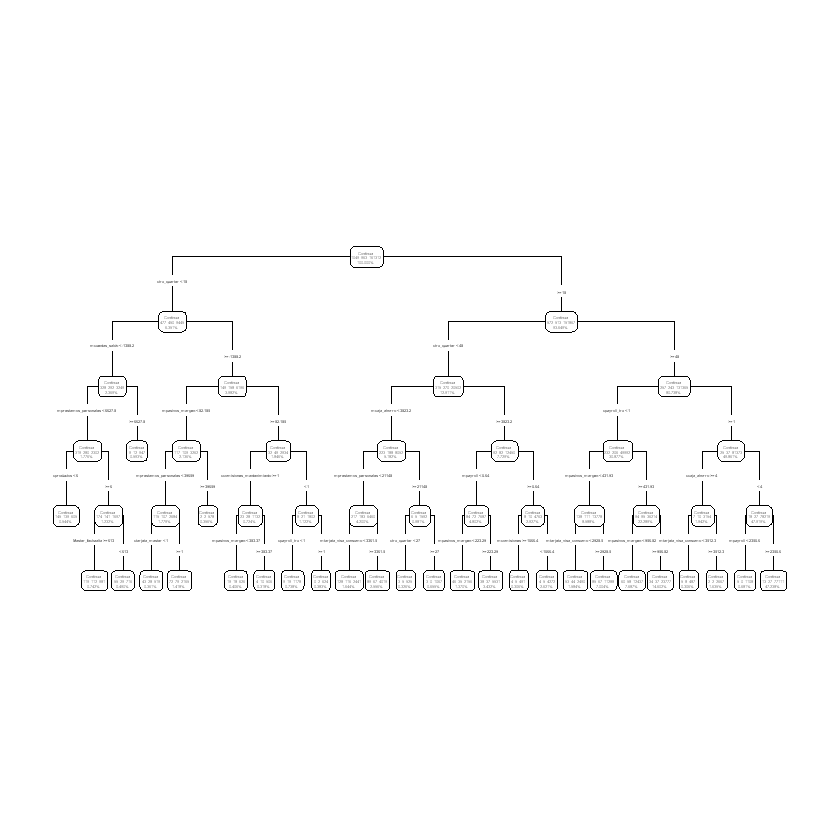

In [4]:
# grafico el arbol
prp(modelo,
        extra = 101, digits = -5,
        branch = 1, type = 4, varlen = 0, faclen = 0
)

In [5]:
# aplico el modelo a los datos nuevos
prediccion <- predict(
        object = modelo,
        newdata = dapply,
        type = "prob"
)

# prediccion es una matriz con TRES columnas,
# llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
# cada columna es el vector de probabilidades

In [6]:
# agrego a dapply una columna nueva que es la probabilidad de BAJA+2
dapply[, prob_baja2 := prediccion[, "BAJA+2"]]

In [7]:
# solo le envio estimulo a los registros
#  con probabilidad de BAJA+2 mayor  a  1/40
dapply[, Predicted := as.numeric(prob_baja2 > 1 / 40)]



In [8]:
# genero el archivo para Kaggle
# primero creo la carpeta donde va el experimento
dir.create("./exp/")
dir.create("./exp/KA2001")

# solo los campos para Kaggle
fwrite(dapply[, list(numero_de_cliente, Predicted)],
        file = "./exp/KA2001/K101_0014.csv",
        sep = ","
)

Warning message in dir.create("./exp/"):
"'.\exp' already exists"
Warning message in dir.create("./exp/KA2001"):
"'.\exp\KA2001' already exists"
